In [ ]:
#https://www.kaggle.com/uciml/pima-indians-diabetes-database
#피마 인디언 당뇨병 예측 - 머신러닝 예측 모델을 수립하고, 평가 지표를 적용

In [ ]:
#모델평가 기능 사용 : KFold, LogisticRegression, MinMaxScaler

In [1]:
#데이터를 로딩한 후 분포와 데이터를 확인
import pandas as pd
pima = pd.read_csv('../data/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#당뇨병에 걸린 사람과 아닌 사람의 수 확인
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

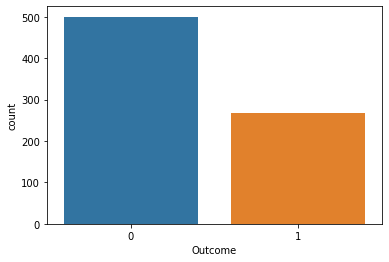

In [36]:
import seaborn as sns
sns.countplot(pima['Outcome'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000121790B8>,
      dtype=object)

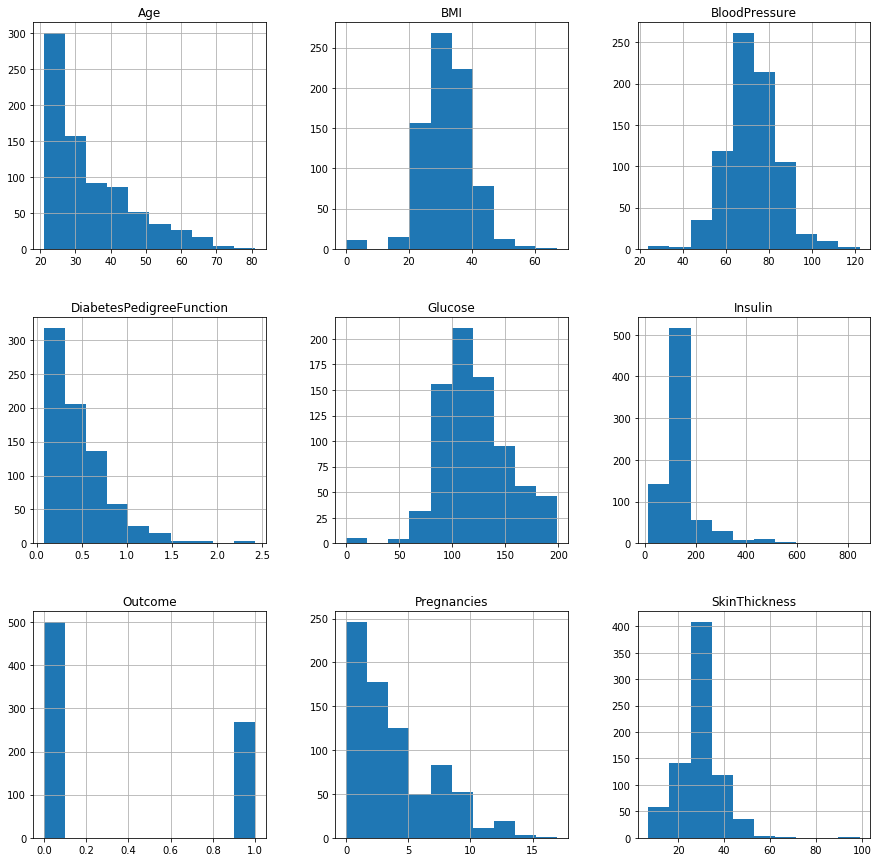

In [34]:
#데이터분포 확인
pima.hist(figsize=(15,15))

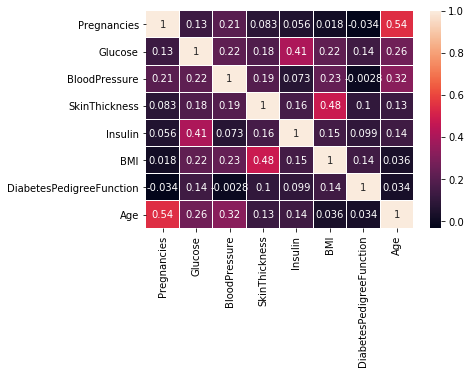

In [35]:
#특성들 간의 상관관계 확인
sns.heatmap(pima.data.corr(), linewidth = 0.01, annot = True)

In [4]:
#3. feature의 타입과 Null 개수 확인
print(pima.isnull().sum())
print(pima.info())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
bad_g = pima["SkinThickness"] == 0
pima.loc[bad_g, "SkinThickness"] = None
sum(pima['SkinThickness']==0)

0

In [6]:
bad_g = pima["BloodPressure"] == 0
pima.loc[bad_g, "BloodPressure"] = None
sum(pima['BloodPressure']==0)

0

In [7]:
bad_g = pima["Insulin"] == 0
pima.loc[bad_g, "Insulin"] = None
sum(pima['Insulin']==0)

0

In [8]:
#0인 값을 결측치로 바꾼 후 중간값으로 대체
pima.fillna(pima.mean(), inplace= True)

In [9]:
#타겟값 설정
pima.target = pima['Outcome']

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [10]:
pima.data = pima.drop('Outcome', axis = 1)

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [11]:
pima.data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.000000,35.00000,155.548223,33.6,0.627,50
1,1,85,66.000000,29.00000,155.548223,26.6,0.351,31
2,8,183,64.000000,29.15342,155.548223,23.3,0.672,32
3,1,89,66.000000,23.00000,94.000000,28.1,0.167,21
4,0,137,40.000000,35.00000,168.000000,43.1,2.288,33
5,5,116,74.000000,29.15342,155.548223,25.6,0.201,30
6,3,78,50.000000,32.00000,88.000000,31.0,0.248,26
7,10,115,72.405184,29.15342,155.548223,35.3,0.134,29
8,2,197,70.000000,45.00000,543.000000,30.5,0.158,53
9,8,125,96.000000,29.15342,155.548223,0.0,0.232,54


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pima.data, pima.target, random_state = 0)

In [13]:
#로지스틱 회귀모델 적용
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

print(lr_clf.score(X_train, y_train))
print(lr_clf.score(X_test, y_test))

0.7673611111111112
0.765625


C:\Users\a\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
#k겹 교차 검증
from sklearn.model_selection import KFold, cross_validate, cross_val_score
kfold = KFold(n_splits = 5)

scores = cross_val_score(lr_clf,pima.data, pima.target, cv = 5)
scores.mean()  
#5개 훈련점수의 평균 : 0.763

C:\Users\a\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.763059163059163

In [24]:
#점수 향상을 위해 MinMaxScaler 적용
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
#다시 로지스틱 회귀 적용
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

print(lr_clf.score(X_train_scaled, y_train))
print(lr_clf.score(X_test_scaled, y_test))
#==>테스트 점수만 향상됨

0.7638888888888888
0.7916666666666666


C:\Users\a\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
